In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
current_path = os.getcwd()
print(current_path)
from read_data.read_listings_tracts_census import read_listings_tracts_census
from read_data.listings_and_tracts import merge_listings_and_tracts

/Users/vmcairos/Documents/github_personal/du/Final-Project-4447


In [2]:
path_to_census = 'Census_Data'
path_to_listings = 'housing_api/listings'
path_to_tracts = 'shapefile_data'
merged_df = read_listings_tracts_census(
    path_to_census=path_to_census,
    path_to_listings=path_to_listings,
    path_to_tracts=path_to_tracts,
)
listings_tracts_df = merge_listings_and_tracts(
    path_to_listings=path_to_listings,
    path_to_tracts=path_to_tracts)

census_df = pd.read_parquet('Census_Data/df_census.parquet')


In [3]:
merged_df.isna().sum()

id                                         0
formattedAddress                           0
addressLine1                               0
addressLine2                             365
city                                       0
state                                      0
zipCode                                    0
county                                     0
latitude                                   0
longitude                                  0
propertyType                               0
bedrooms                                  48
bathrooms                                 26
squareFootage                             19
yearBuilt                                 22
status                                     0
price                                      0
listingType                                0
listedDate                                 0
removedDate                             1479
createdDate                                0
lastSeenDate                               0
daysOnMark

In [4]:
census_df.columns.tolist()

['Tract',
 'Total Population',
 'Occupied housing units',
 'Median monthly housing cost',
 'Median household income',
 'Median household income below 100k (percent occupied housing units)',
 'Median household income 100k to 149k (percent occupied housing units)',
 'Median household income 150k and above (percent occupied housing units)',
 'At or above the poverty level (Unemployment Rate)',
 'Population 25 to 64 years (Unemployment Rate)',
 'Bachelors degree or higher (Unemployment Rate)']

In [5]:
print(listings_tracts_df['tract_name'].unique())
census_df = census_df.rename({'Tract': 'tract_name'}, axis =1)
print(census_df['tract_name'].unique())


['6.04' '6.01' '6.03' '1.02' '5.05' '2.02' '4.02' '4.01' '7.01' '2.01'
 '3.01' '5.03' '5.02' '3.02' '904' '901' '910.01' '919' '818' '913' '912'
 '902' '918' '915' '820' '917' '821' '916' '911' '906' '903' '817' '801'
 '819' '1010.01' '1001' '1011.01' '1009' '1011.02' nan '1010.02' '1703.01'
 '1707.02' '1704' '1705.04' '1705.03' '1701.01' '1706.01' '1103.01'
 '1104.03' '1401.06' '1105.02' '1102.01' '1104.01' '1101.04' '1106.07'
 '1105.01' '1101.06' '1404' '108.01' '203.02' '708.02' '705.01' '107.01'
 '108.02' '107.02' '105' '106' '201.01' '703.02' '702.01' '701.02'
 '704.02' '707' '202' '703.01' '101.04' '702.02' '104.03' '709.02' '706'
 '705.02' '104.05' '708.01' '709.01' '712.01' '303.02' '102.06' '301'
 '303.01' '701.04' '503' '203.05' '401' '305' '304' '402' '302' '408.01'
 '504' '506' '203.04' '203.01' '403' '1006.01' '921.01' '924' '1005'
 '1006.03' '922' '1008' '1708' '1801.01' '1707.01' '1302' '1303' '1301.01'
 '1304.02' '1304.04' '1304.06' '1401.02' '1403' '1402.02' '1402.01'


In [6]:
census_df.isna().sum()

tract_name                                                                 0
Total Population                                                           0
Occupied housing units                                                     0
Median monthly housing cost                                                0
Median household income                                                    0
Median household income below 100k (percent occupied housing units)        0
Median household income 100k to 149k (percent occupied housing units)      0
Median household income 150k and above (percent occupied housing units)    0
At or above the poverty level (Unemployment Rate)                          0
Population 25 to 64 years (Unemployment Rate)                              0
Bachelors degree or higher (Unemployment Rate)                             0
dtype: int64

In [7]:
listings_tracts_df.isna().sum()

id                     0
formattedAddress       0
addressLine1           0
addressLine2         377
city                   0
state                  0
zipCode                0
county                 0
latitude               0
longitude              0
propertyType           0
bedrooms              48
bathrooms             26
squareFootage         19
yearBuilt             22
status                 0
price                  0
listingType            0
listedDate             0
removedDate         1498
createdDate            0
lastSeenDate           0
daysOnMarket           0
mlsName                2
mlsNumber              2
listingAgent          31
listingOffice          2
history                0
lotSize              786
hoa                  548
builder             1496
geometry               0
index_right           19
statefp               19
countyfp              19
tractce               19
geoid                 19
tract_name            19
namelsad              19
mtfcc                 19


## Descriptive Statistics
Comment in difference of magnitude across features.

In [8]:
merged_df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
latitude,1479.0,42.3,0.0,42.2,42.3,42.3,42.4,42.4
longitude,1479.0,-71.1,0.0,-71.2,-71.1,-71.1,-71.1,-71.0
bedrooms,1431.0,3.1,3.5,0.0,2.0,2.0,3.0,59.0
bathrooms,1453.0,2.4,2.2,1.0,1.0,2.0,2.5,34.0
squareFootage,1460.0,2007.1,2557.0,175.0,953.0,1350.5,2291.8,46682.0
yearBuilt,1457.0,1951.4,58.8,1798.0,1900.0,1932.0,2017.0,2025.0
price,1479.0,2123886.2,3394782.6,40000.0,699000.0,1050000.0,2005000.0,40000000.0
daysOnMarket,1479.0,75.5,113.9,1.0,21.0,36.0,93.0,1298.0
lotSize,700.0,576747.7,7542698.4,175.0,1081.8,2089.0,4509.0,99999821.0
index_right,1479.0,118.2,73.4,0.0,51.0,114.0,189.0,241.0


## Missing Values Analysis

In [9]:
# Check for missing values in each column
missing_values = merged_df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))


removedDate                             1479
lotSize                                  779
addressLine2                             365
median_monthly_housing_cost               71
pop_25_to_64_yrs_unemployment_r           71
at_or_above_pov_level_unemployment_r      71
median_housing_income_150k_above          71
median_housing_income_100k_149k           71
median_housing_income_below_100k          71
median_household_income                   71
occupied_housing_units                    71
total_pop                                 71
bach_degree_unemployment_r                71
bedrooms                                  48
bathrooms                                 26
yearBuilt                                 22
squareFootage                             19
listingOffice                              2
dtype: int64


# Plot Distributions of Key Numerical Features

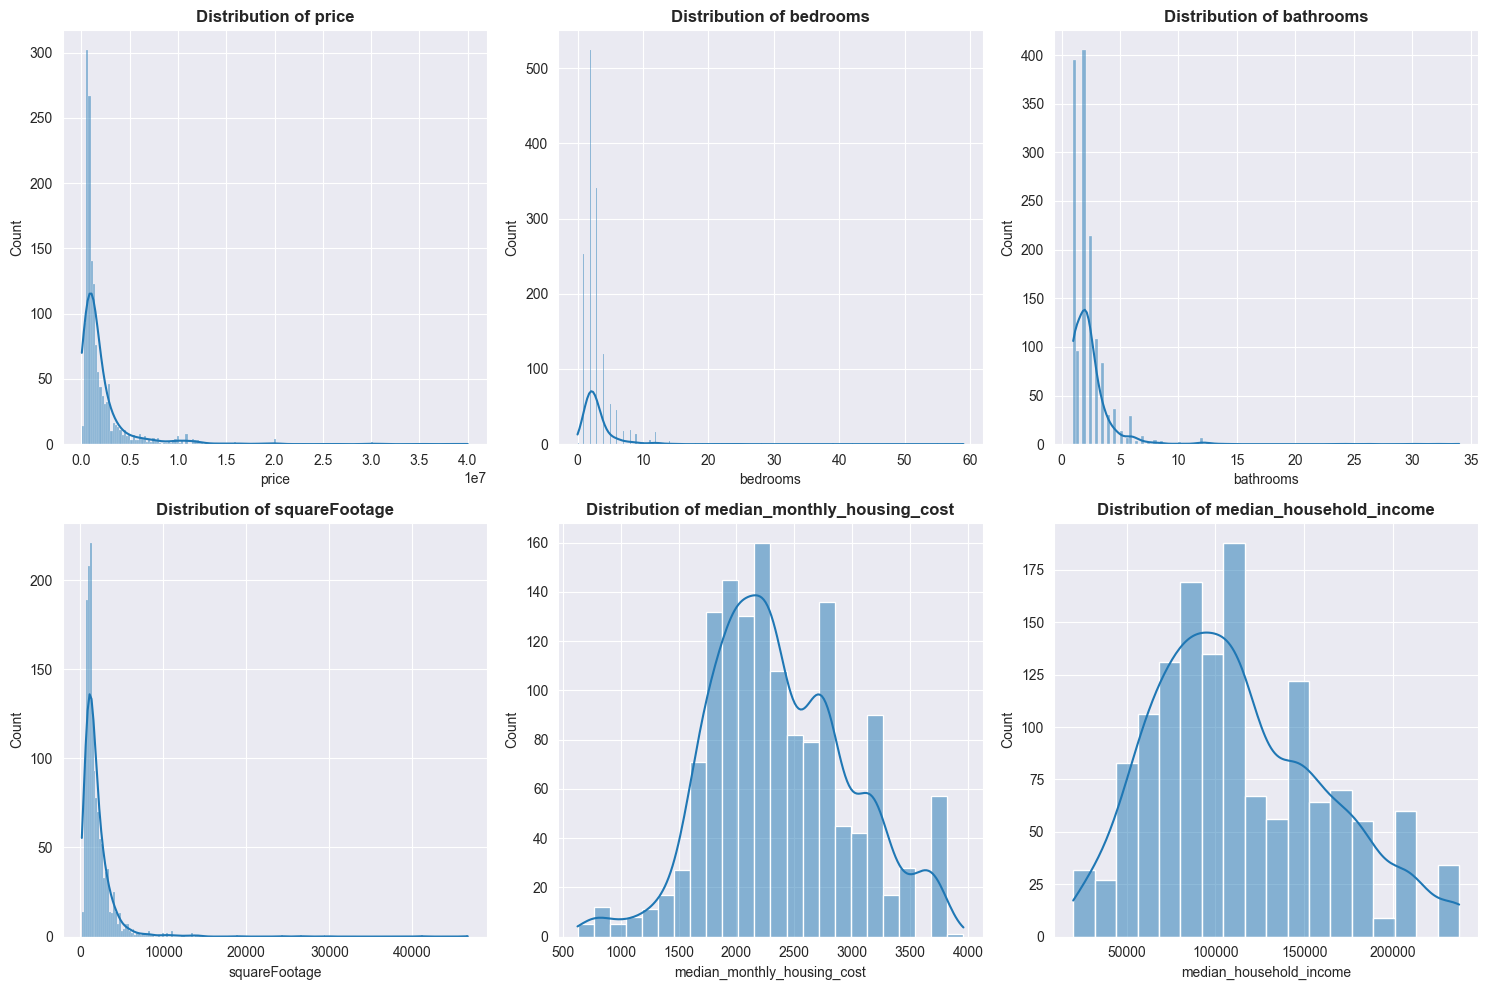

In [10]:
# columns to examine
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'squareFootage', 'median_monthly_housing_cost', 'median_household_income']

# Plot distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(merged_df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}', fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation Matrix of Key Numerical Features

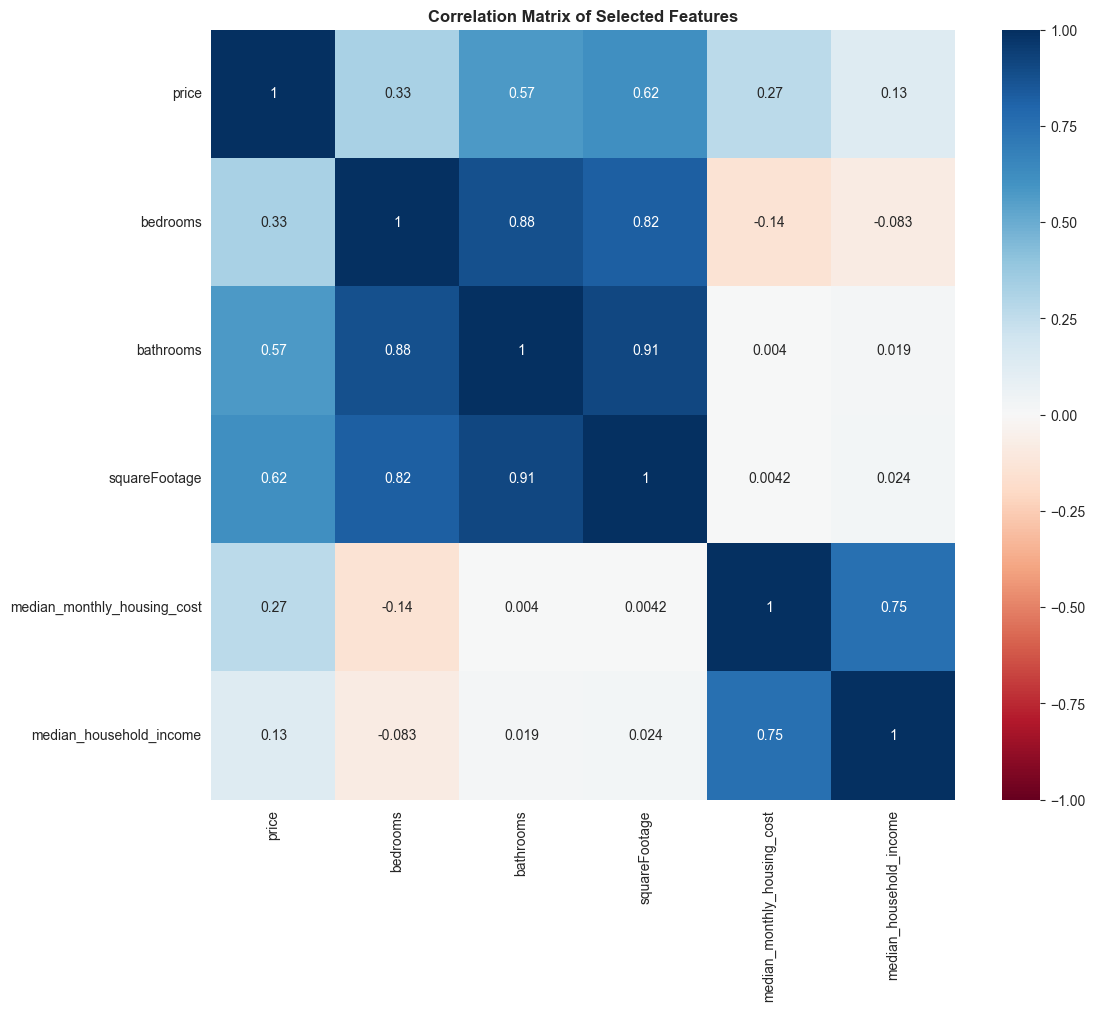

In [11]:
# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(merged_df[columns_to_plot].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features', fontweight='bold')
plt.show()


High Correlation May indicate multicollinearity between features. This could impact model efficacy if not handled properly.

Features with Correlation Values:
- bathrooms, bedrooms
- squareFootage, bathrooms
- squareFootage, bedrooms
- median_monthly_housing_cost, median_household_income

# Census Demographic Data vs. Property Features

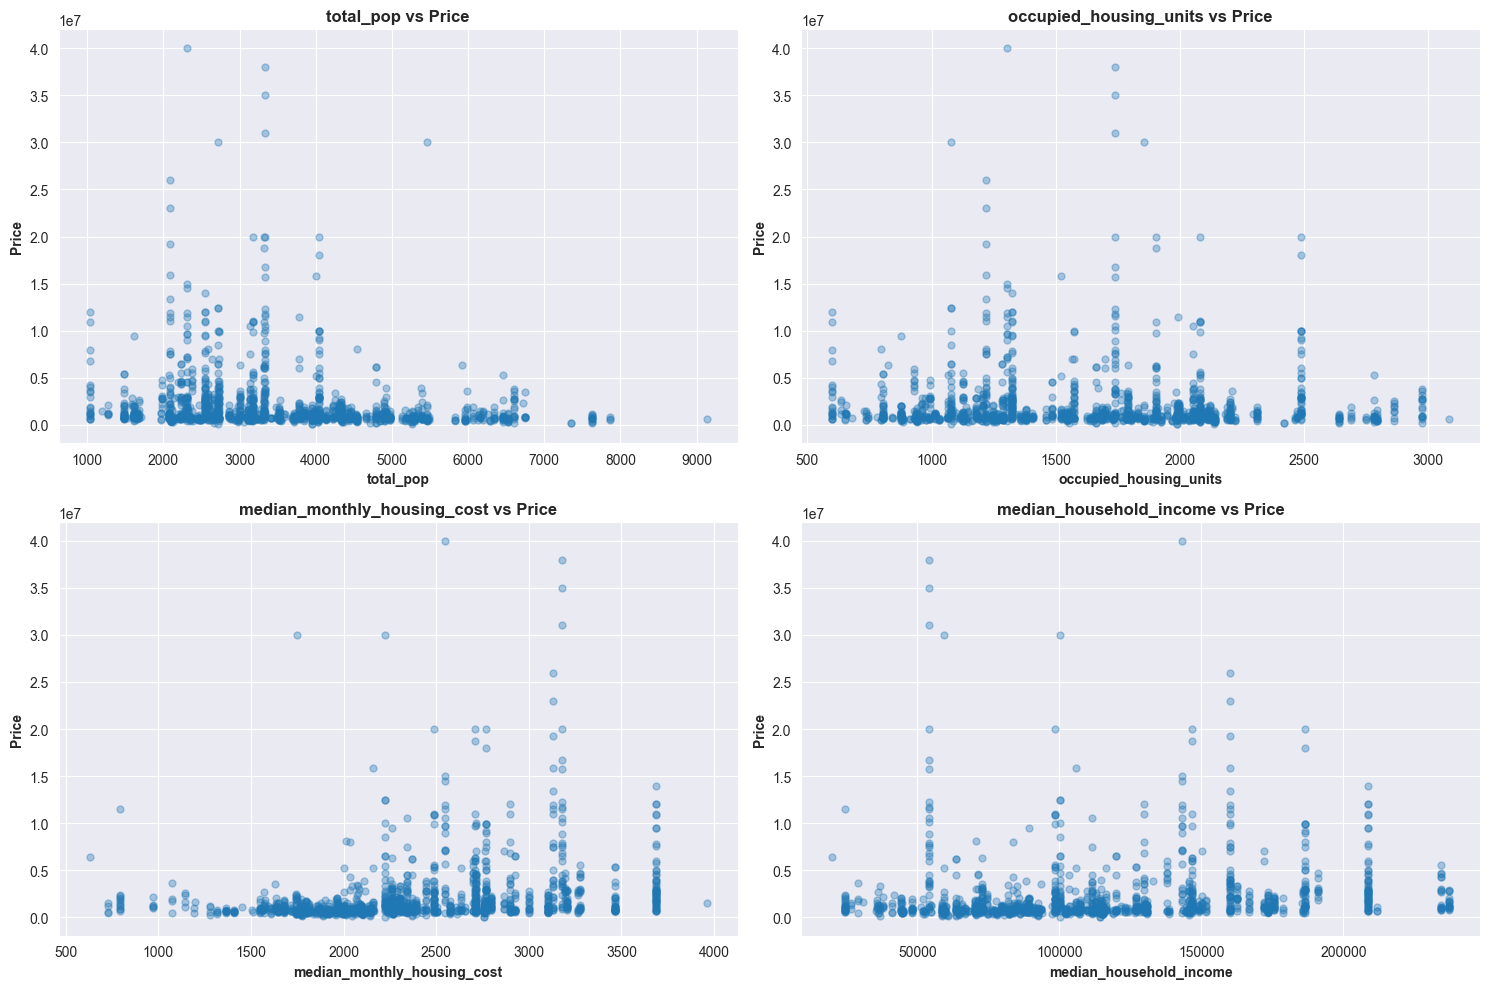

In [12]:
census_cols = ['total_pop', 'occupied_housing_units', 'median_monthly_housing_cost', 'median_household_income']

plt.figure(figsize=(15,10))
# Loop through each column in census_cols
for i, col in enumerate(census_cols, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    plt.scatter(merged_df[col], merged_df['price'], s=25, alpha=0.35)
    plt.title(f'{col} vs Price', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Price', fontweight='bold')

plt.tight_layout()
plt.show()


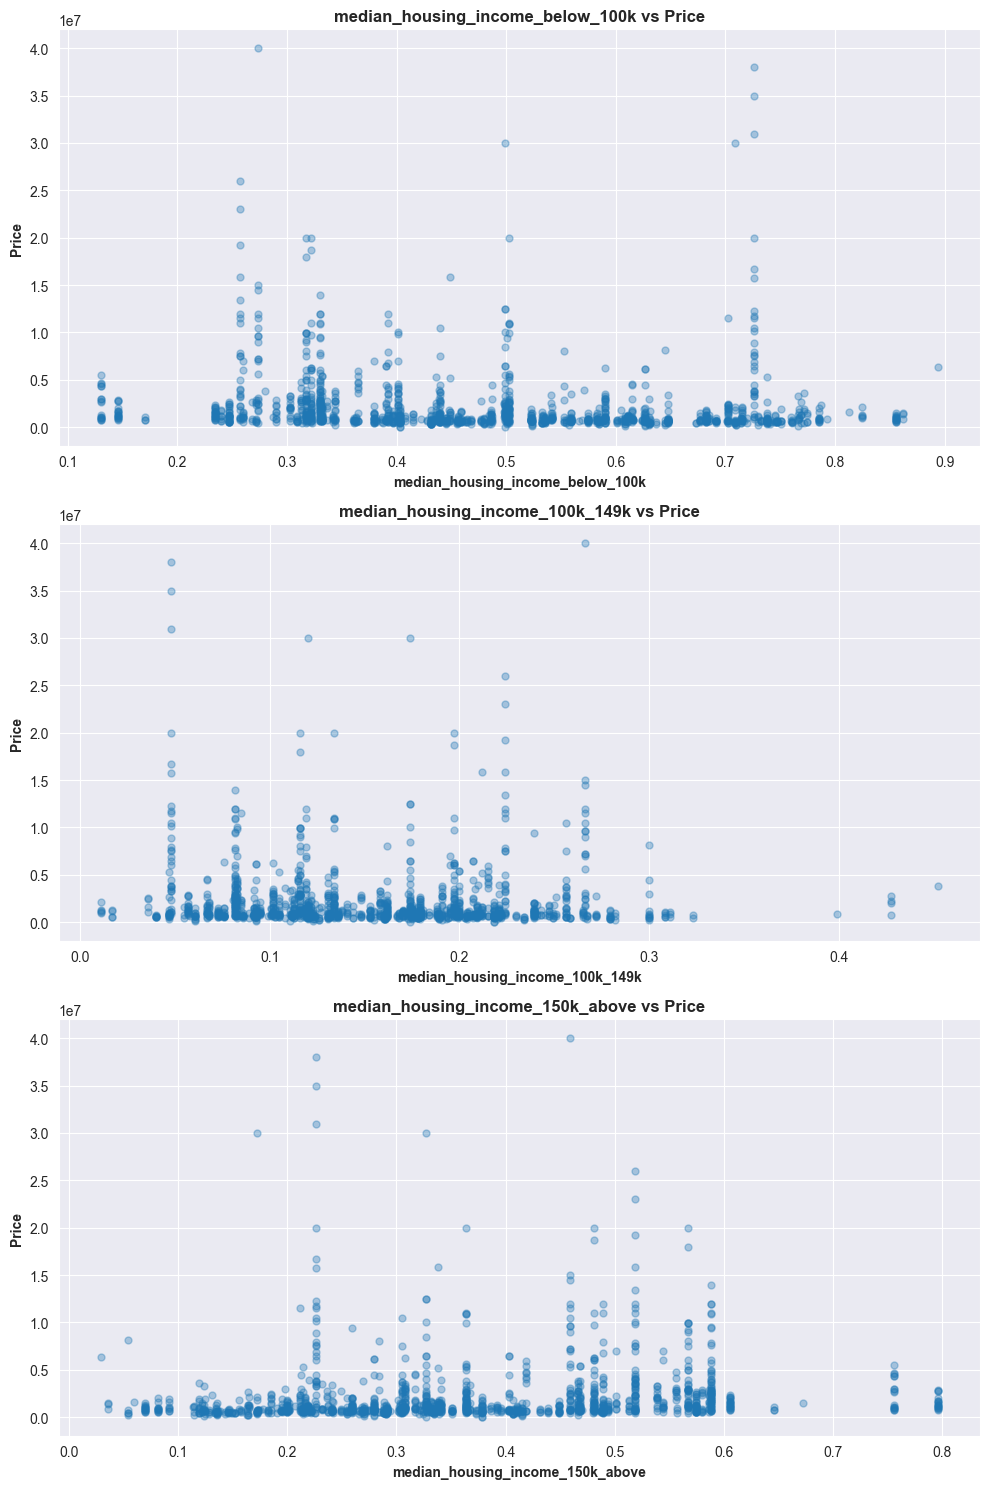

In [13]:
# percent occupied housing units across median household income brackets
census_cols = ['median_housing_income_below_100k', 'median_housing_income_100k_149k', 'median_housing_income_150k_above']

plt.figure(figsize=(10,15))
# Loop through each column in census_cols
for i, col in enumerate(census_cols, 1):
    plt.subplot(3, 1, i)  # create a 3x1 grid of subplots
    plt.scatter(merged_df[col], merged_df['price'], s=25, alpha=0.35)
    plt.title(f'{col} vs Price', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Price', fontweight='bold')

plt.tight_layout()
plt.show()


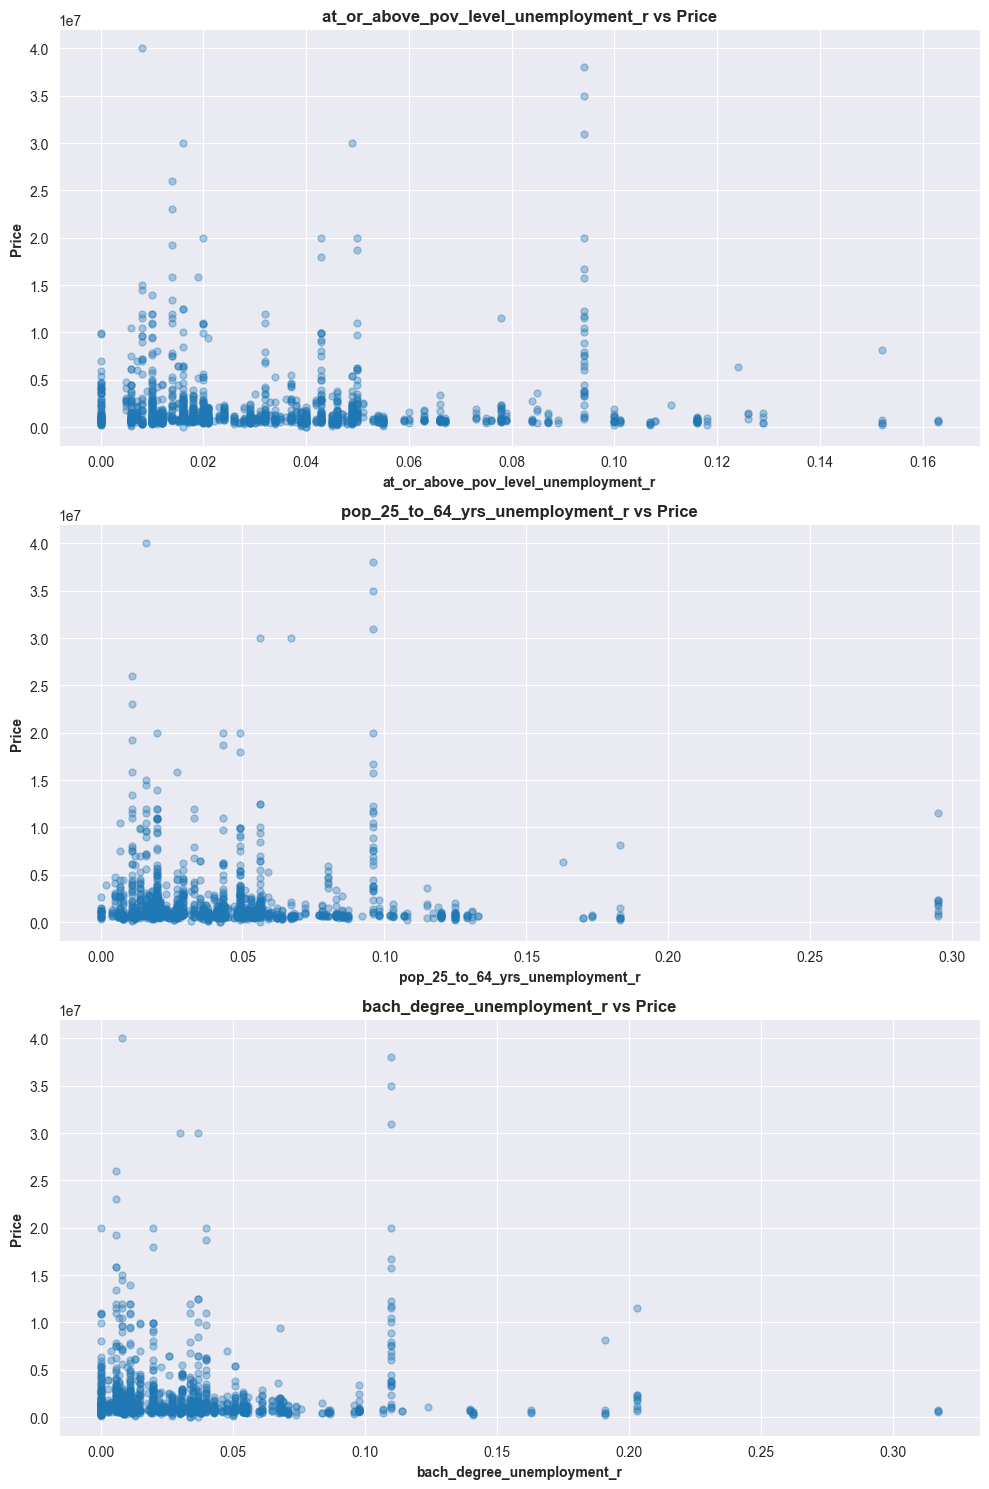

In [14]:
# unemployement rates across different categories
census_cols = ['at_or_above_pov_level_unemployment_r', 'pop_25_to_64_yrs_unemployment_r', 'bach_degree_unemployment_r']

plt.figure(figsize=(10,15))
# Loop through each column in census_cols
for i, col in enumerate(census_cols, 1):
    plt.subplot(3, 1, i)  # create a 3x1 grid of subplots
    plt.scatter(merged_df[col], merged_df['price'], s=25, alpha=0.35)
    plt.title(f'{col} vs Price', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Price', fontweight='bold')

plt.tight_layout()
plt.show()


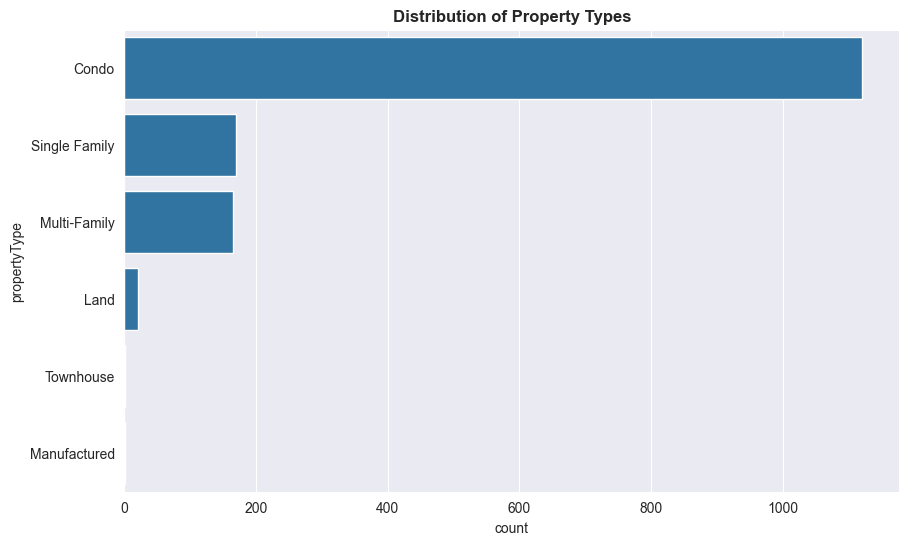

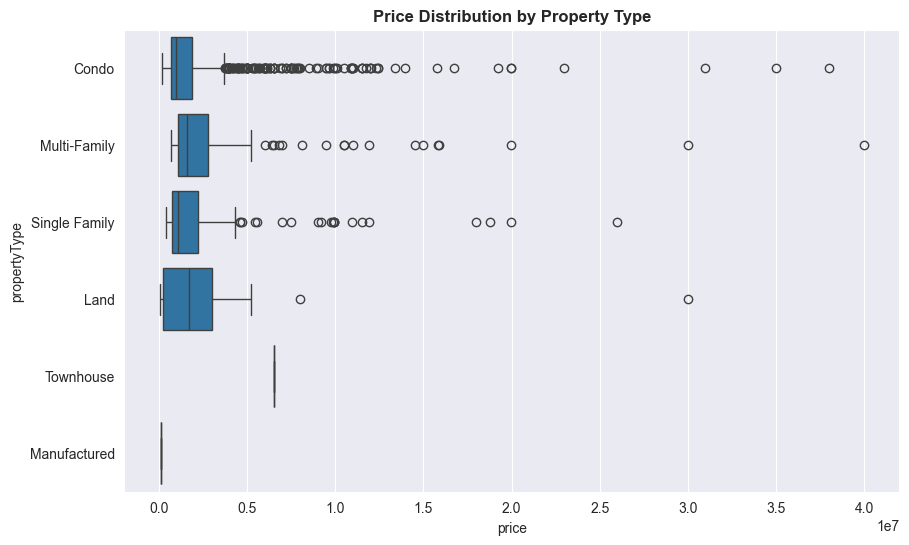

In [15]:
# count plot for property type
plt.figure(figsize=(10, 6))
sns.countplot(y='propertyType', data=merged_df, order=merged_df['propertyType'].value_counts().index)
plt.title('Distribution of Property Types', fontweight='bold')
plt.show()

# box plot of price by property type
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', y='propertyType', data=merged_df)
plt.title('Price Distribution by Property Type', fontweight='bold')
plt.show()


# Feature Engineering

## Initial Removal of Unwanted Features
We believe the features listed in the unwanted_features object will not be provide predictive value to listing price. 
Notice that we will have to remove lot size because more than 50% of the data is missing.

In [16]:
unwanted_features = ['id', 'formattedAddress', 'addressLine1', 'addressLine2',
                     'state', 'county', 'geometry', 'index_right', 'statefp', 'countyfp',
                     'tractce', 'geoid', 'tract_name', 'namelsad', 'removedDate', 'lotSize', 'listingOffice',
                     'listedDate', 'createdDate', 'lastSeenDate', 'status'
                     ]
merged_df = merged_df.drop(columns=unwanted_features).copy()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1479 entries, 0 to 1497
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city                                  1479 non-null   object 
 1   zipCode                               1479 non-null   object 
 2   latitude                              1479 non-null   float64
 3   longitude                             1479 non-null   float64
 4   propertyType                          1479 non-null   object 
 5   bedrooms                              1431 non-null   float64
 6   bathrooms                             1453 non-null   float64
 7   squareFootage                         1460 non-null   float64
 8   yearBuilt                             1457 non-null   float64
 9   price                                 1479 non-null   int64  
 10  listingType                           1479 non-null   object 
 11  daysOnMarket          

## Creation of Dummy Variables

In [17]:
categorical_features = ['propertyType', 'city', 'zipCode', 'listingType']
df_categorical = merged_df[categorical_features].copy()
df_categorical_dummies = pd.get_dummies(data=df_categorical, drop_first=True, dtype=int)
df_categorical_dummies.head()

,propertyType_Land,propertyType_Manufactured,propertyType_Multi-Family,propertyType_Single Family,propertyType_Townhouse,city_Beacon Hill,city_Boston,city_Brighton,city_Chelsea,city_East Boston,...,zipCode_02134,zipCode_02135,zipCode_02136,zipCode_02150,zipCode_02151,zipCode_02152,zipCode_02199,zipCode_02210,zipCode_02215,listingType_Standard
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
df_categorical_dummies.tail()

,propertyType_Land,propertyType_Manufactured,propertyType_Multi-Family,propertyType_Single Family,propertyType_Townhouse,city_Beacon Hill,city_Boston,city_Brighton,city_Chelsea,city_East Boston,...,zipCode_02134,zipCode_02135,zipCode_02136,zipCode_02150,zipCode_02151,zipCode_02152,zipCode_02199,zipCode_02210,zipCode_02215,listingType_Standard
1493,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1494,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1495,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1496,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1497,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
merged_df = merged_df.drop(columns=categorical_features).copy()
merged_df = pd.concat([merged_df, df_categorical_dummies], axis=0).copy()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2958 entries, 0 to 1497
Data columns (total 67 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   latitude                              1479 non-null   float64
 1   longitude                             1479 non-null   float64
 2   bedrooms                              1431 non-null   float64
 3   bathrooms                             1453 non-null   float64
 4   squareFootage                         1460 non-null   float64
 5   yearBuilt                             1457 non-null   float64
 6   price                                 1479 non-null   float64
 7   daysOnMarket                          1479 non-null   float64
 8   area                                  1479 non-null   float64
 9   total_pop                             1408 non-null   float64
 10  occupied_housing_units                1408 non-null   float64
 11  median_monthly_housing

In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2958 entries, 0 to 1497
Data columns (total 67 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   latitude                              1479 non-null   float64
 1   longitude                             1479 non-null   float64
 2   bedrooms                              1431 non-null   float64
 3   bathrooms                             1453 non-null   float64
 4   squareFootage                         1460 non-null   float64
 5   yearBuilt                             1457 non-null   float64
 6   price                                 1479 non-null   float64
 7   daysOnMarket                          1479 non-null   float64
 8   area                                  1479 non-null   float64
 9   total_pop                             1408 non-null   float64
 10  occupied_housing_units                1408 non-null   float64
 11  median_monthly_housing

## Creation of Density Feature

In [21]:
merged_df['density'] = merged_df['area'] / merged_df['total_pop']
print(merged_df[['density', 'total_pop', 'area']].describe())
merged_df = merged_df.drop(columns=['area', 'total_pop']).copy()

           density    total_pop         area
count  1408.000000  1408.000000  1479.000000
mean      0.000157  3574.325284     0.564824
std       0.000124  1389.501249     0.602283
min       0.000033  1031.000000     0.057686
25%       0.000060  2550.000000     0.199979
50%       0.000112  3316.000000     0.366583
75%       0.000212  4429.000000     0.719375
max       0.000796  9131.000000     9.018702


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2958 entries, 0 to 1497
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   latitude                              1479 non-null   float64
 1   longitude                             1479 non-null   float64
 2   bedrooms                              1431 non-null   float64
 3   bathrooms                             1453 non-null   float64
 4   squareFootage                         1460 non-null   float64
 5   yearBuilt                             1457 non-null   float64
 6   price                                 1479 non-null   float64
 7   daysOnMarket                          1479 non-null   float64
 8   occupied_housing_units                1408 non-null   float64
 9   median_monthly_housing_cost           1408 non-null   float64
 10  median_household_income               1408 non-null   float64
 11  median_housing_income_

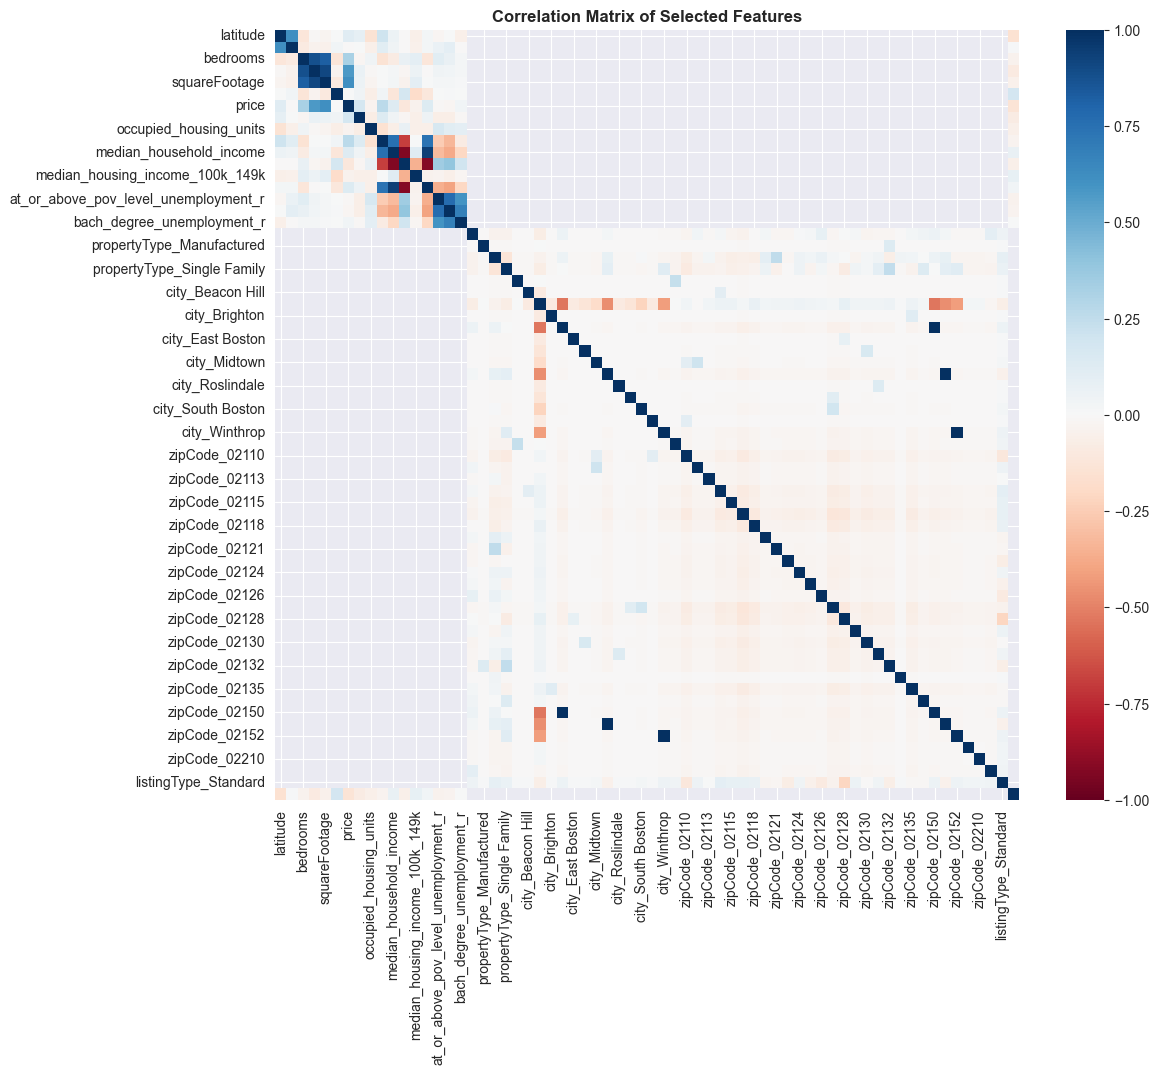

In [27]:

def plot_corr(data: pd.DataFrame, title: str | None = None, columns_to_plot: list | None = None, annot: bool = False):
    plt.figure(figsize=(12, 10))
    if columns_to_plot is None:
        columns_to_plot = data.columns.tolist()
    corr_df = data[columns_to_plot].corr()
    sns.heatmap(corr_df, annot=annot, cmap='RdBu', vmin=-1, vmax=1)
    if title is None:
        title = 'Correlation Matrix of Selected Features'
    plt.title(title, fontweight='bold')
    plt.show()
    return corr_df
    
corr_df = plot_corr(merged_df)


In [35]:
corr_price = pd.DataFrame(corr_df['price'])
corr_price['absolute_correlation'] = corr_price['price'].abs()
corr_price = corr_price.sort_values(by='absolute_correlation', ascending=False)
corr_price

,price,absolute_correlation
price,1.000000,1.000000
squareFootage,0.615120,0.615120
bathrooms,0.573981,0.573981
bedrooms,0.326703,0.326703
median_monthly_housing_cost,0.266862,0.266862
...,...,...
zipCode_02152,NaN,NaN
zipCode_02199,NaN,NaN
zipCode_02210,NaN,NaN
zipCode_02215,NaN,NaN
